In [1]:
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from konlpy.tag import Mecab
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
import numpy as np

data = np.random.randint(-100, 100, 50).cumsum()
data

array([  59,   43,   99,  136,   71,   18,  111,  132,  115,  172,   72,
        156,   78,   69,   92,    5,   93,  169,  192,  206,  207,  284,
        222,  232,  249,  153,  192,   95,  159,   60,   67,   -2,   25,
         57,   68,   62,   30,  -59, -100, -166, -210, -296, -277, -319,
       -378, -420, -355, -313, -393, -374])

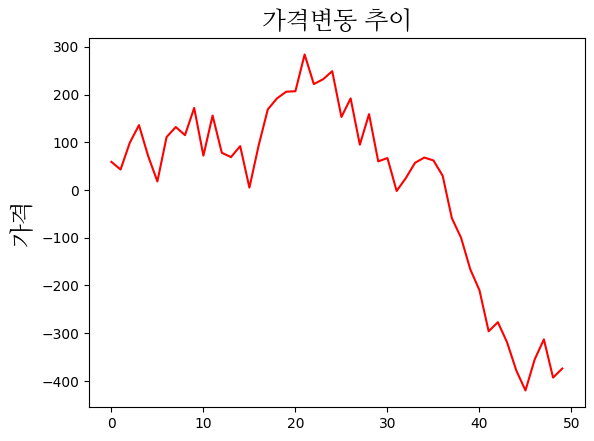

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 지정된 경로의 폰트가 존재하는지 확인
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
try:
    with open(path) as f:
        pass
except IOError:
    print(f"Error: Font file not found at {path}")
    # 경로가 맞지 않다면, 다른 폰트를 사용해 보거나, 경로를 조사해 보세요.
    path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 경로 확인 후 사용

# 폰트를 설정하고 그래프를 그리기
fontprop = fm.FontProperties(fname=path, size=18)

plt.plot(range(50), data, 'r')
plt.title('가격변동 추이', fontproperties=fontprop)
plt.ylabel('가격', fontproperties=fontprop)
plt.show()


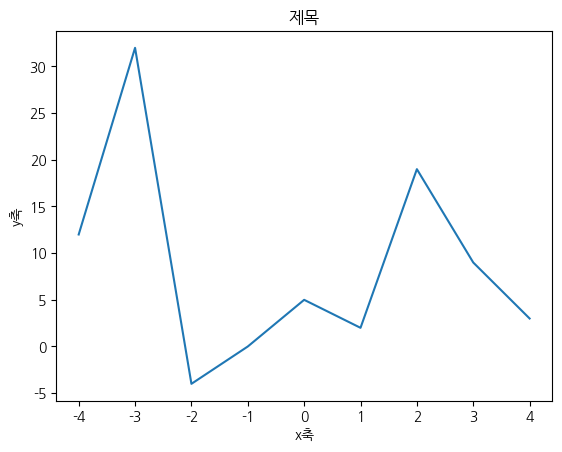

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.plot([-4, -3, -2, -1, 0, 1, 2, 3, 4], [12, 32, -4, 0, 5, 2, 19, 9, 3])
plt.xlabel('x축')
plt.ylabel('y축')
plt.title('제목')
plt.show()

In [5]:

# Load the data
file_path = 'youtube_channel_comments_data_20240606_104600.csv'
data = pd.read_csv(file_path)


In [6]:
# Load 'youtube_channel_video_text_data.csv'
channel_video_text_data = pd.read_csv('youtube_channel_video_text_data.csv')

# data에 channel_video_text_data의  '채널구분' 컬럼을 추가
# '채널 ID' 컬럼의 이름을 'channelId'로 변경하여 병합 준비
channel_video_text_data.rename(columns={'채널ID': 'channelId'}, inplace=True)

# 'channelId'를 기준으로 병합하여 '채널구분' 컬럼 추가
data = pd.merge(data, channel_video_text_data[['channelId', '채널구분']], on='channelId', how='left')

# 결과 확인
print(data.head())

                  channelId    channelTitle    channelPublishedAt  \
0  UCMFk5S7g5DY-CZNVh_Kyz_A  약사가 들려주는 약 이야기  2017-03-02T02:28:38Z   
1  UCMFk5S7g5DY-CZNVh_Kyz_A  약사가 들려주는 약 이야기  2017-03-02T02:28:38Z   
2  UCMFk5S7g5DY-CZNVh_Kyz_A  약사가 들려주는 약 이야기  2017-03-02T02:28:38Z   
3  UCMFk5S7g5DY-CZNVh_Kyz_A  약사가 들려주는 약 이야기  2017-03-02T02:28:38Z   
4  UCMFk5S7g5DY-CZNVh_Kyz_A  약사가 들려주는 약 이야기  2017-03-02T02:28:38Z   

   subscriberCount      videoId                          videoTitle  \
0          1780000  qlLkiUU0o1A  우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호   
1          1780000  qlLkiUU0o1A  우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호   
2          1780000  qlLkiUU0o1A  우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호   
3          1780000  qlLkiUU0o1A  우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호   
4          1780000  qlLkiUU0o1A  우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호   

              videoAuthorId      videoPublishedAt duration  viewCount  \
0  UCMFk5S7g5DY-CZNVh_Kyz_A  2024-06-05T08:18:39Z    PT56S      19765   
1  UCMFk5S7g

In [7]:

# Convert videoPublishedAt to datetime
data['videoPublishedAt'] = pd.to_datetime(data['videoPublishedAt'])

# Calculate the view counts for each video
video_view_counts = data.groupby(['channelId', 'videoId', 'videoTitle']).agg(
    viewCount=('viewCount', 'first')
).reset_index()



In [8]:
# Get top 3 most viewed videos for each channel
top_videos = video_view_counts.sort_values(by='viewCount', ascending=False).groupby('channelId').head(3)

# Filter the original data to include only comments from the top videos
top_video_comments = data[data['videoId'].isin(top_videos['videoId'])]

# Display the statistics in a table format
# from IPython.display import display
# display(top_video_comments)

top_video_comments.head()

,channelId,channelTitle,channelPublishedAt,subscriberCount,videoId,videoTitle,videoAuthorId,videoPublishedAt,duration,viewCount,likeCount,dislikeCount,commentId,commentAuthor,authorId,commentText,commentLikeCount,commentPublishedAt,parentCommentId,채널구분
62310,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,1a6s-lpMxdc,커피를 이렇게 마시면? 혈중 콜레스테롤 수치가 높아지고 혈당이 올라가니 주의하세요....,UCMFk5S7g5DY-CZNVh_Kyz_A,2023-11-07 10:00:01+00:00,PT11M13S,1587594,15430,0,Ugy3gVTyQERhWZsVcwp4AaABAg,@user-gt2cw6mk2v,UCUJzCd2nSsZH1Xa5MUjMZIQ,커피를 많이 마신다 적게 마신다(영상에서는 9잔까지의 예시가 나오는데요) 1잔 당 ...,0,2024-06-04T17:18:55Z,NaN,A
62311,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,1a6s-lpMxdc,커피를 이렇게 마시면? 혈중 콜레스테롤 수치가 높아지고 혈당이 올라가니 주의하세요....,UCMFk5S7g5DY-CZNVh_Kyz_A,2023-11-07 10:00:01+00:00,PT11M13S,1587594,15430,0,Ugy3gVTyQERhWZsVcwp4AaABAg,@user-gt2cw6mk2v,UCUJzCd2nSsZH1Xa5MUjMZIQ,커피를 많이 마신다 적게 마신다(영상에서는 9잔까지의 예시가 나오는데요) 1잔 당 ...,0,2024-06-04T17:18:55Z,NaN,A
62312,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,1a6s-lpMxdc,커피를 이렇게 마시면? 혈중 콜레스테롤 수치가 높아지고 혈당이 올라가니 주의하세요....,UCMFk5S7g5DY-CZNVh_Kyz_A,2023-11-07 10:00:01+00:00,PT11M13S,1587594,15430,0,Ugy3gVTyQERhWZsVcwp4AaABAg,@user-gt2cw6mk2v,UCUJzCd2nSsZH1Xa5MUjMZIQ,커피를 많이 마신다 적게 마신다(영상에서는 9잔까지의 예시가 나오는데요) 1잔 당 ...,0,2024-06-04T17:18:55Z,NaN,A
62313,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,1a6s-lpMxdc,커피를 이렇게 마시면? 혈중 콜레스테롤 수치가 높아지고 혈당이 올라가니 주의하세요....,UCMFk5S7g5DY-CZNVh_Kyz_A,2023-11-07 10:00:01+00:00,PT11M13S,1587594,15430,0,UgyAqDMXuRfayPiO_p14AaABAg,@user-ee9ph5wv4z,UCnUPTCdkVLGfqRSrOHsuzKg,신경안쓰고 적당히 살다갈래요,0,2024-06-04T01:57:27Z,NaN,A
62314,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,1a6s-lpMxdc,커피를 이렇게 마시면? 혈중 콜레스테롤 수치가 높아지고 혈당이 올라가니 주의하세요....,UCMFk5S7g5DY-CZNVh_Kyz_A,2023-11-07 10:00:01+00:00,PT11M13S,1587594,15430,0,UgyAqDMXuRfayPiO_p14AaABAg,@user-ee9ph5wv4z,UCnUPTCdkVLGfqRSrOHsuzKg,신경안쓰고 적당히 살다갈래요,0,2024-06-04T01:57:27Z,NaN,A


In [9]:
top_video_comments.shape

(19233, 20)

In [10]:
# 한국어 불용어 리스트
stop_words  = set([
    '이', '그', '저', '것', '수', '것을', '그리고', '더', '더욱', '너무', '정말', '진짜', '이제', '다시', '이런', '저런', '그런', '또', '또는',
    '하지만', '그러나', '그래도', '반면에', '이외에', '이렇게', '저렇게', '여기', '저기', '이것', '저것', '여러', '여러분', '너', '나', '우리',
    '당신', '어떤', '어느', '무엇', '누구', '모두', '많은', '좋은', '아주', '매우', '너무', '정말', '진짜', '자주', '항상', '가장', '크게', '작게',
    '게', '거'
])

In [11]:
# 추가 불용어 정의
custom_stop_words = set([
    '안녕하세요', '감사합니다', '잘', '다시', '정말', '이것', '그것', '그리고', '그러나', '하지만', 
    '해서', '하는', '같은', '이런', '저런', '그런', '할', '있는', '없는', '있는지', '없는지', '시청', '감사', '생각',
    '양과자', '선생'
])

In [12]:
# 확장된 영양제 및 관련 키워드 목록 정의
nutrient_keywords = set([
    # 영양제 및 건강보조식품
    '비타민', '칼슘', '오메가3', '프로바이오틱스', '철분', '마그네슘', '아연', '비타민A', '비타민B', '비타민C', '비타민D', '비타민E', '엽산',
    '멜라토닌', '베르베린', '유산균', '단백질', '아미노산', '콜라겐', '코엔자임Q10', '글루타민', '알로에',
    '홍삼', '녹용', '스피루리나', '클로렐라', '히알루론산', '글루코사민', '로얄젤리', '프로폴리스',
    
    # 질병
    '면역', '피로', '피곤', '수면', '스트레스', '소화', '혈압', '당뇨', '콜레스테롤', '간', '간건강', '심장',
    '장', '장건강', '알레르기', '감기', '독감', '빈혈', '치매', '우울증', '불안증', '폐렴', '천식',
    
    # 신체 부위
    '관절', '뼈', '눈', '피부', '탈모', '간', '심장', '장', '위', '신장', '간', '폐', '두뇌', '척추', '근육',
    
    # 증상
    '소화불량', '변비', '설사', '복통', '두통', '어지럼증', '피부건조', '여드름', '탈모', '부종', '수족냉증',
    '불면증', '과민성대장증후군', '속쓰림', '메스꺼움', '구토', '기침', '가래', '가슴답답함', '숨가쁨',
    
    # 추가 키워드
    '항산화', '항염', '항바이러스', '항균', '항진균', '디톡스', '해독', '활력', '에너지', '체력증강', '근력증가'
])

In [13]:
# 메캅 초기화
mecab = Mecab()

In [14]:
# 텍스트 전처리 함수
def preprocess_text(text):
    tokens = mecab.morphs(text)
    tokens = [word for word in tokens if word not in stop_words and word not in custom_stop_words]
    return tokens

In [15]:
# 워드 클라우드 생성 및 시각화 함수
def generate_word_cloud(text, title):
       
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        colormap='viridis'
    ).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()


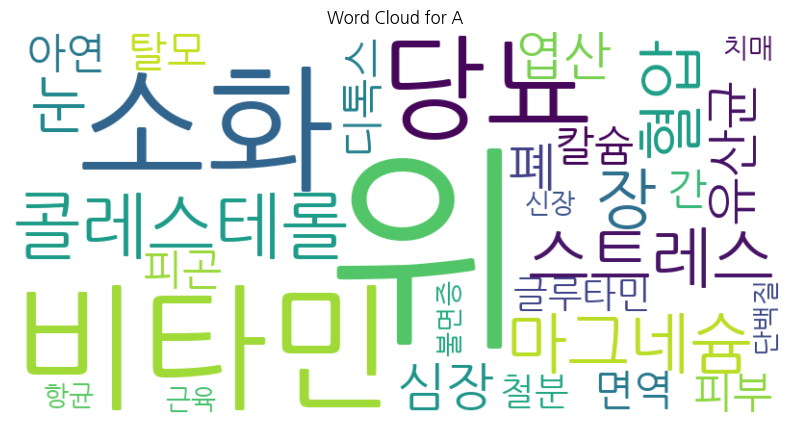

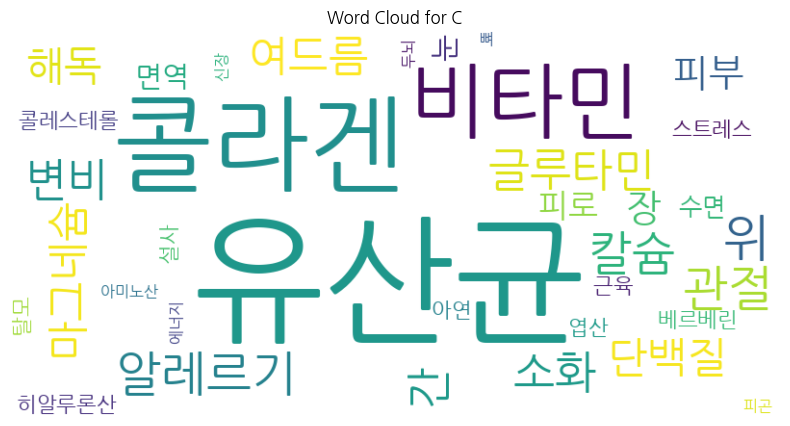

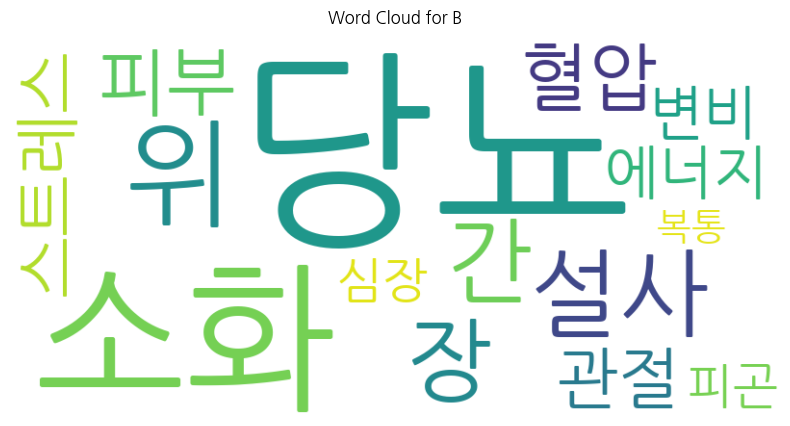

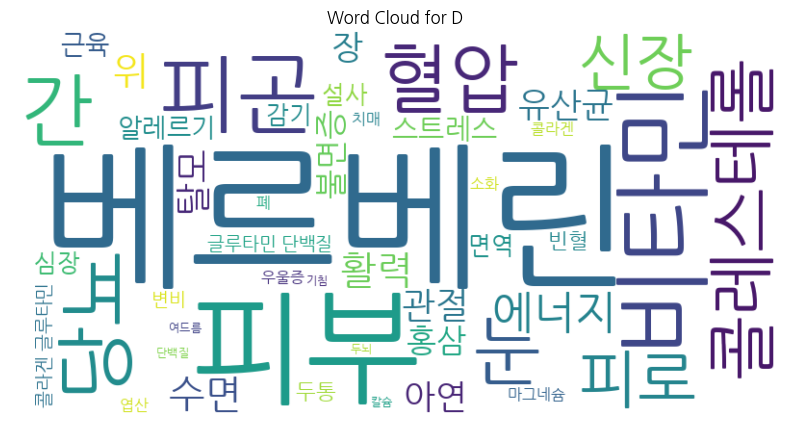

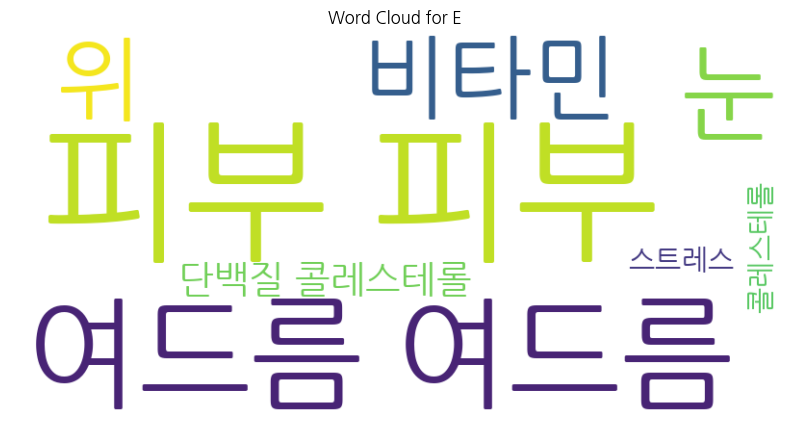

In [16]:
# 샘플링할 댓글 수 설정 (예: 500개)
sample_size = 1000

# 각 채널별로 댓글을 전처리하고 워드 클라우드를 생성
channels = top_video_comments['channelId'].unique()
channel_titles = top_video_comments.groupby('channelId')['channelTitle'].first()
channel_gubun = top_video_comments.groupby('channelId')['채널구분'].first()

# for channel_id in channels:
#     channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
#     all_comments = ' '.join(channel_comments['commentText'].dropna())
#     tokens = preprocess_text(all_comments)
#     filtered_tokens = [word for word in tokens if word in nutrient_keywords]
#     text = ' '.join(filtered_tokens)
#     generate_word_cloud(text, f"Word Cloud for {channel_titles[channel_id]}")

for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    # print(all_comments)
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    text = ' '.join(filtered_tokens)
    generate_word_cloud(text, f"Word Cloud for {channel_gubun[channel_id]}")

/home/arkwith/aSSIST/aSSIST_DM1/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'간': np.float64(0.08574929257125441), '근육': np.float64(0.042874646285627205), '글루타민': np.float64(0.08574929257125441), '눈': np.float64(0.17149858514250882), '단백질': np.float64(0.042874646285627205), '당뇨': np.float64(0.25724787771376323), '디톡스': np.float64(0.08574929257125441), '마그네슘': np.float64(0.21437323142813602), '면역': np.float64(0.08574929257125441), '불면증': np.float64(0.042874646285627205), '비타민': np.float64(0.38587181657064484), '소화': np.float64(0.38587181657064484), '스트레스': np.float64(0.21437323142813602), '신장': np.float64(0.042874646285627205), '심장': np.float64(0.12862393885688161), '아연': np.float64(0.08574929257125441), '엽산': np.float64(0.12862393885688161), '위': np.float64(0.4716211091418993), '유산균': np.float64(0.12862393885688161), '장': np.float64(0.21437323142813602), '철분': np.float64(0.08574929257125441), '치매': np.float64(0.042874646285627205), '칼슘': np.float64(0.08574929257125441), '콜레스테롤': np.float64(0.25724787771376323), '탈모': np.float64(0.08574929257125441), '피곤': np.f

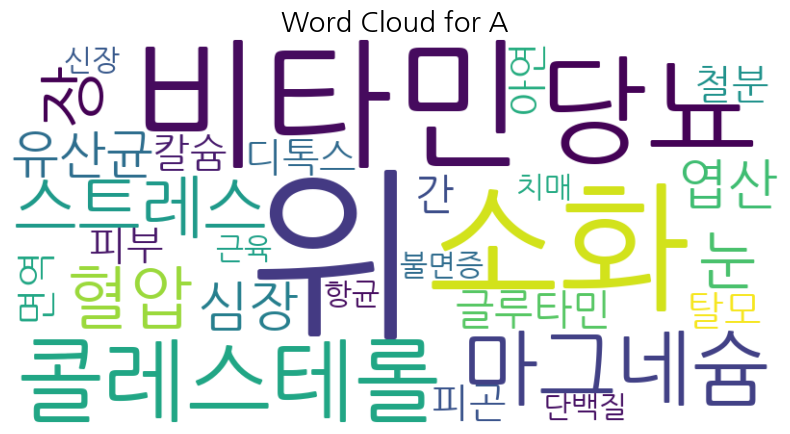

{'간': np.float64(0.04423955993535981), '관절': np.float64(0.053087471922431774), '근육': np.float64(0.008847911987071962), '글루타민': np.float64(0.04423955993535981), '눈': np.float64(0.017695823974143925), '단백질': np.float64(0.03981560394182383), '두뇌': np.float64(0.004423955993535981), '마그네슘': np.float64(0.03981560394182383), '면역': np.float64(0.017695823974143925), '베르베린': np.float64(0.008847911987071962), '변비': np.float64(0.04423955993535981), '비타민': np.float64(0.24774153563801493), '뼈': np.float64(0.004423955993535981), '소화': np.float64(0.04423955993535981), '수면': np.float64(0.013271867980607943), '스트레스': np.float64(0.008847911987071962), '신장': np.float64(0.004423955993535981), '아미노산': np.float64(0.004423955993535981), '아연': np.float64(0.008847911987071962), '알레르기': np.float64(0.053087471922431774), '에너지': np.float64(0.004423955993535981), '여드름': np.float64(0.03981560394182383), '엽산': np.float64(0.008847911987071962), '위': np.float64(0.05751142791596776), '유산균': np.float64(0.8582474627459803

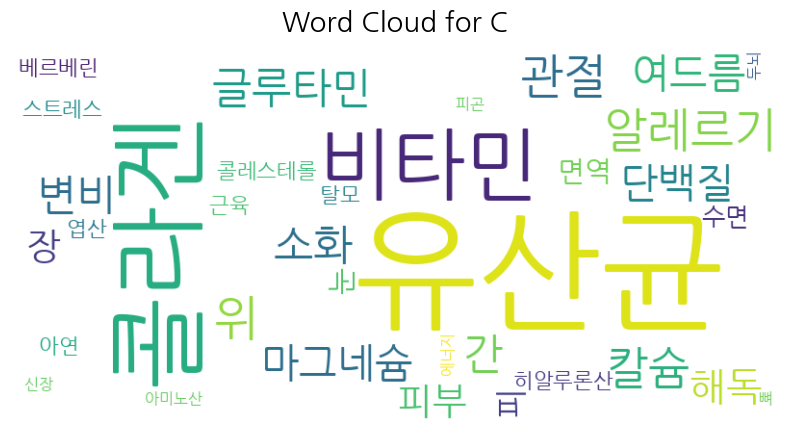

{'간': np.float64(0.11320502839602564), '관절': np.float64(0.05660251419801282), '당뇨': np.float64(0.8490377129701924), '변비': np.float64(0.042451885648509616), '복통': np.float64(0.014150628549503205), '소화': np.float64(0.4386694850345994), '스트레스': np.float64(0.05660251419801282), '심장': np.float64(0.02830125709900641), '에너지': np.float64(0.042451885648509616), '위': np.float64(0.19810879969304487), '장': np.float64(0.11320502839602564), '피곤': np.float64(0.02830125709900641), '피부': np.float64(0.07075314274751603), '혈압': np.float64(0.07075314274751603)}


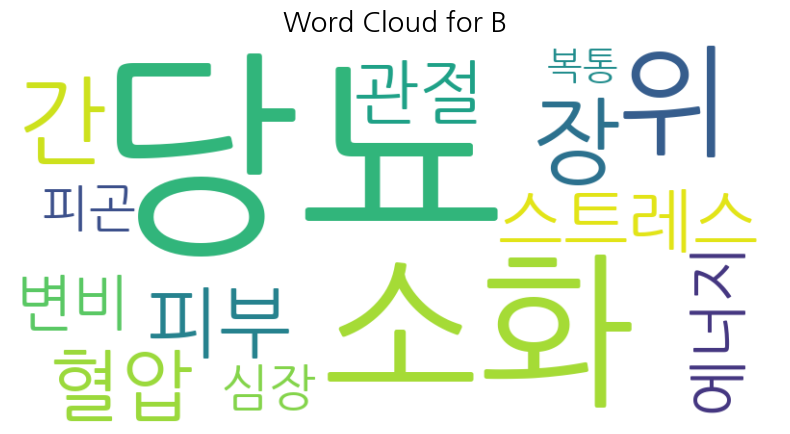

{'간': np.float64(0.1541037151959846), '감기': np.float64(0.0256839525326641), '관절': np.float64(0.05650469557186102), '근육': np.float64(0.030820743039196918), '글루타민': np.float64(0.015410371519598459), '기침': np.float64(0.00513679050653282), '너지': np.float64(0.01027358101306564), '눈': np.float64(0.13355655316985332), '단백질': np.float64(0.02054716202613128), '당뇨': np.float64(0.16437729620905023), '두뇌': np.float64(0.00513679050653282), '두통': np.float64(0.00513679050653282), '마그네슘': np.float64(0.01027358101306564), '면역': np.float64(0.0256839525326641), '베르베린': np.float64(0.7499714139537916), '변비': np.float64(0.015410371519598459), '불면증': np.float64(0.046231114558795375), '비타민': np.float64(0.2517027348201082), '빈혈': np.float64(0.02054716202613128), '소화': np.float64(0.01027358101306564), '수면': np.float64(0.06677827658492666), '스트레스': np.float64(0.03595753354572974), '신장': np.float64(0.09759901962412357), '심장': np.float64(0.0256839525326641), '아연': np.float64(0.030820743039196918), '알레르기': np.float

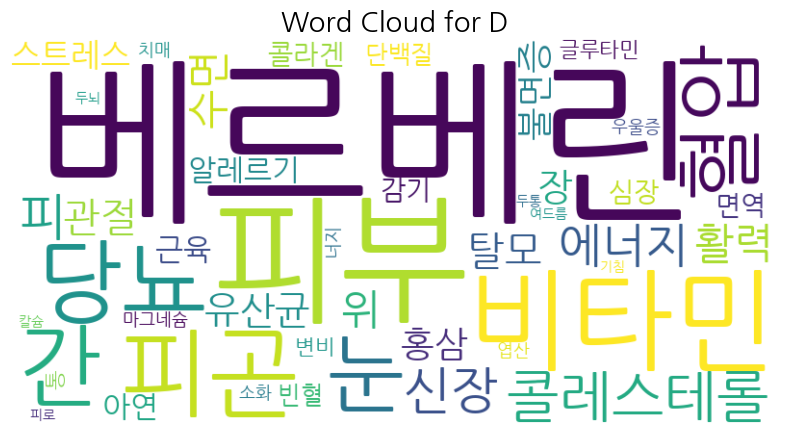

{'눈': np.float64(0.24196695924791364), '단백질': np.float64(0.09678678369916546), '비타민': np.float64(0.19357356739833093), '스트레스': np.float64(0.04839339184958273), '여드름': np.float64(0.4839339184958273), '위': np.float64(0.19357356739833093), '콜레스테롤': np.float64(0.14518017554874818), '피부': np.float64(0.7742942695933237)}


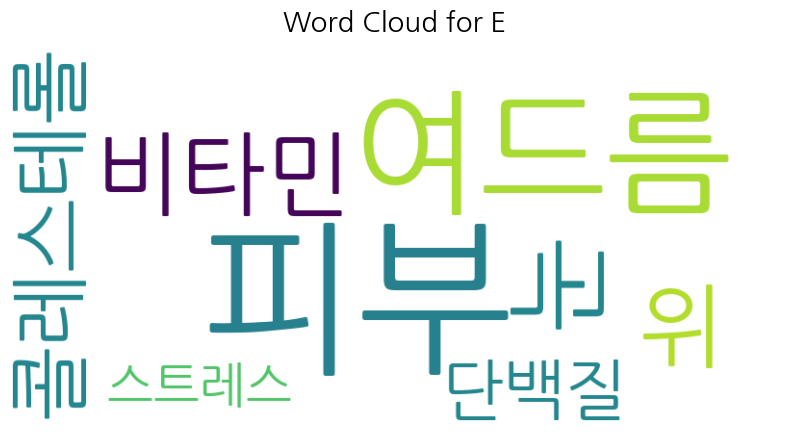

In [17]:
#채널별 TF-IDF기반 키워드 워드클라우드
from sklearn.feature_extraction.text import TfidfVectorizer

# Mecab 초기화
# mecab = Mecab()

# 토크나이저 함수 정의
def mecab_tokenizer(text):
    return mecab.nouns(text)

# 각 채널별로 댓글을 전처리하고 워드 클라우드를 생성
channels = top_video_comments['channelId'].unique()
channel_titles = top_video_comments.groupby('channelId')['channelTitle'].first()

for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]

    # TF-IDF를 사용하여 키워드 추출
    tfidf_vectorizer = TfidfVectorizer(tokenizer=mecab_tokenizer, lowercase=False)
    tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(filtered_tokens)])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()
    features_scores = dict(zip(feature_names, tfidf_scores))
    print(features_scores)

    # TF-IDF 점수를 기반으로 워드 클라우드 생성
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 경로
        colormap='viridis'
    ).generate_from_frequencies(features_scores)

    # 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {channel_gubun[channel_id]}", fontsize=20)
    plt.axis('off')
    plt.show()

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc

# 한글 폰트 설정 (예: NanumGothic, AppleGothic, Malgun Gothic 등)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 폰트 경로를 시스템에 맞게 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

def create_keyword_network(tokens):
    G = nx.Graph()
    # 토큰 리스트에서 연속된 키워드 쌍을 노드로 추가
    for i in range(len(tokens) - 1):
        if tokens[i] in nutrient_keywords and tokens[i+1] in nutrient_keywords:
            if G.has_edge(tokens[i], tokens[i+1]):
                G[tokens[i]][tokens[i+1]]['weight'] += 1
            else:
                G.add_edge(tokens[i], tokens[i+1], weight=1)
    return G



def draw_network(G, title):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.15, iterations=20)
    nx.draw_networkx(G, pos, node_color='lightblue', with_labels=True, node_size=3000, edge_color='gray', font_size=15, font_family=font_name)  # 폰트 크기를 15로 설정
    plt.title(title, fontsize=20)
    plt.show()

def calculate_centrality(G):
    centrality = nx.degree_centrality(G)
    # 중심성이 높은 상위 5개 노드 출력
    top_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("Top 5 nodes by centrality:", top_centrality)


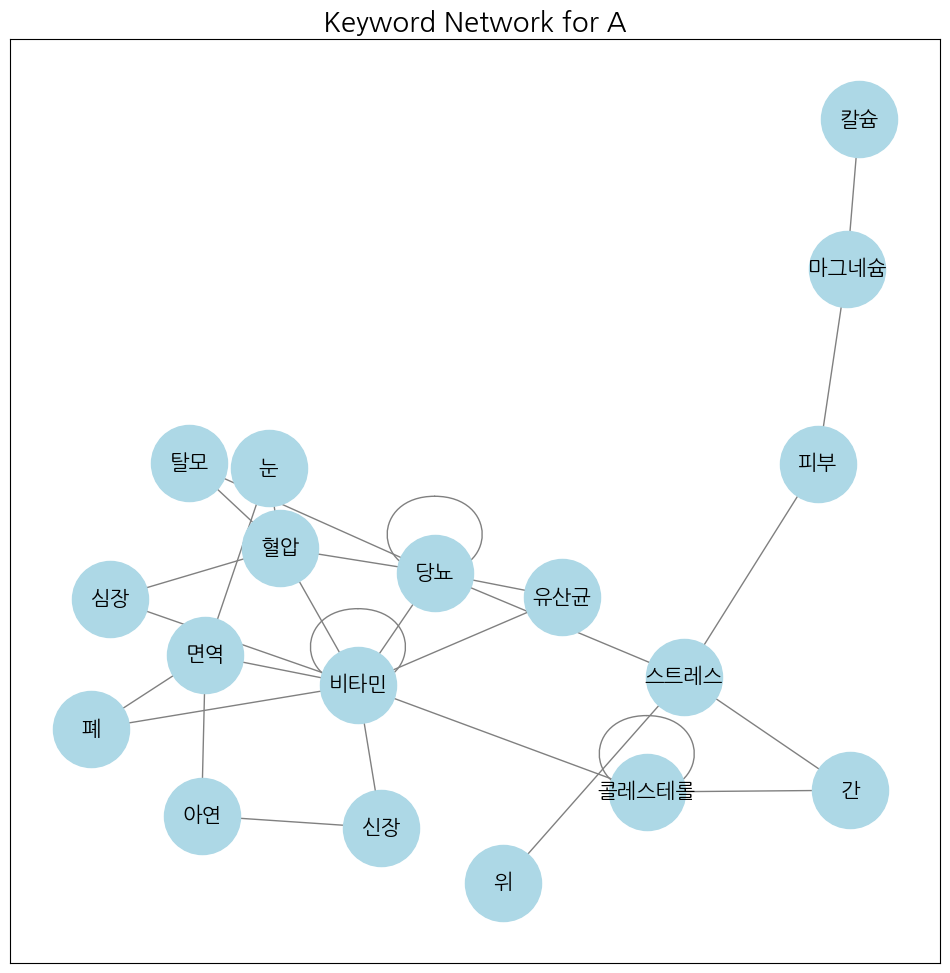

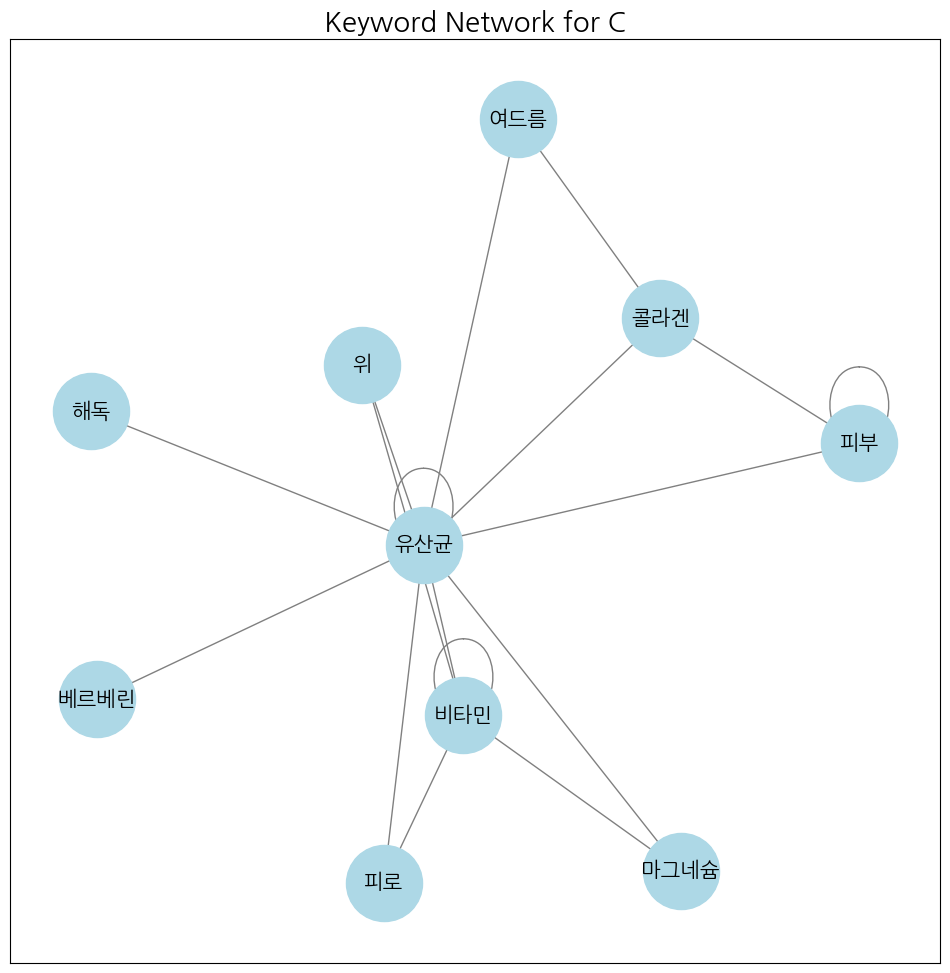

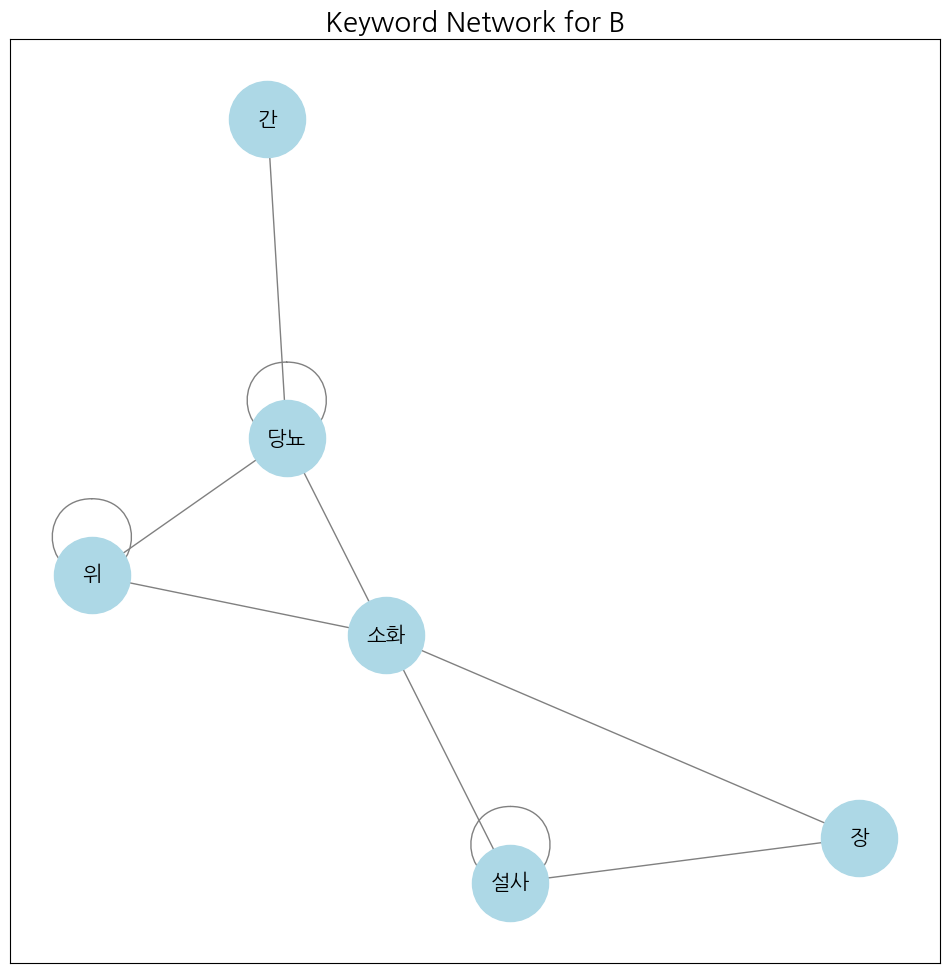

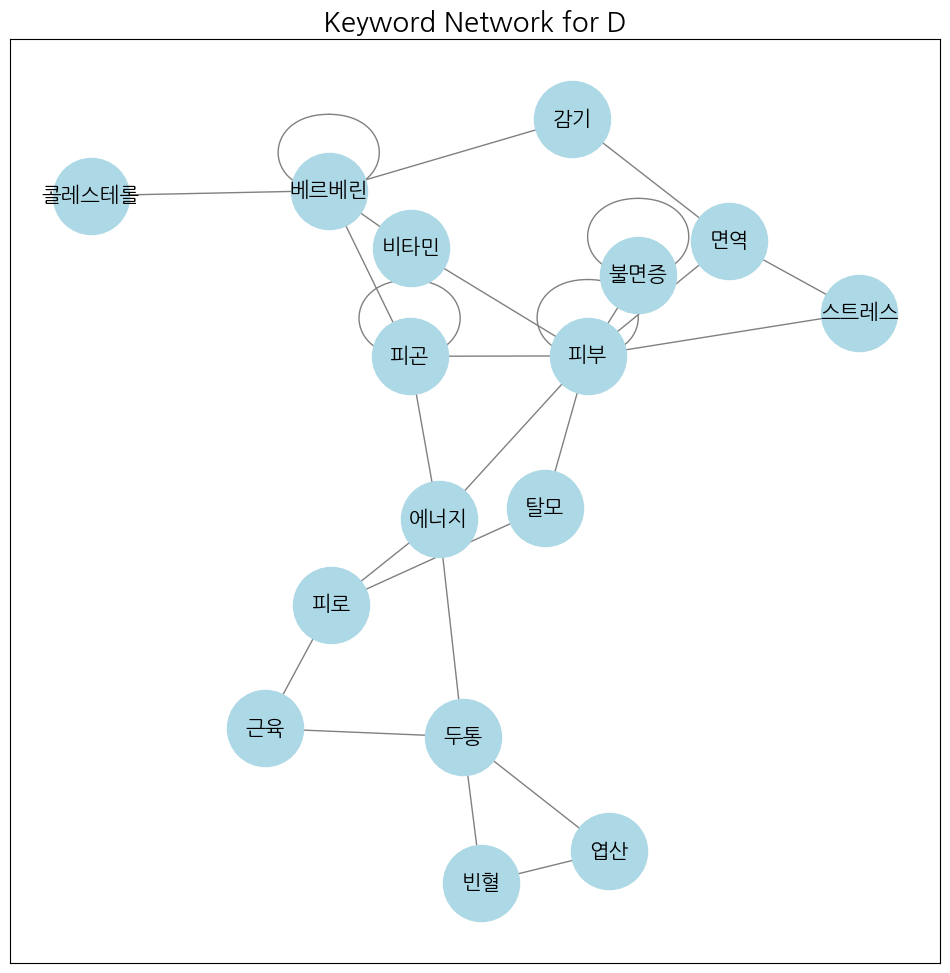

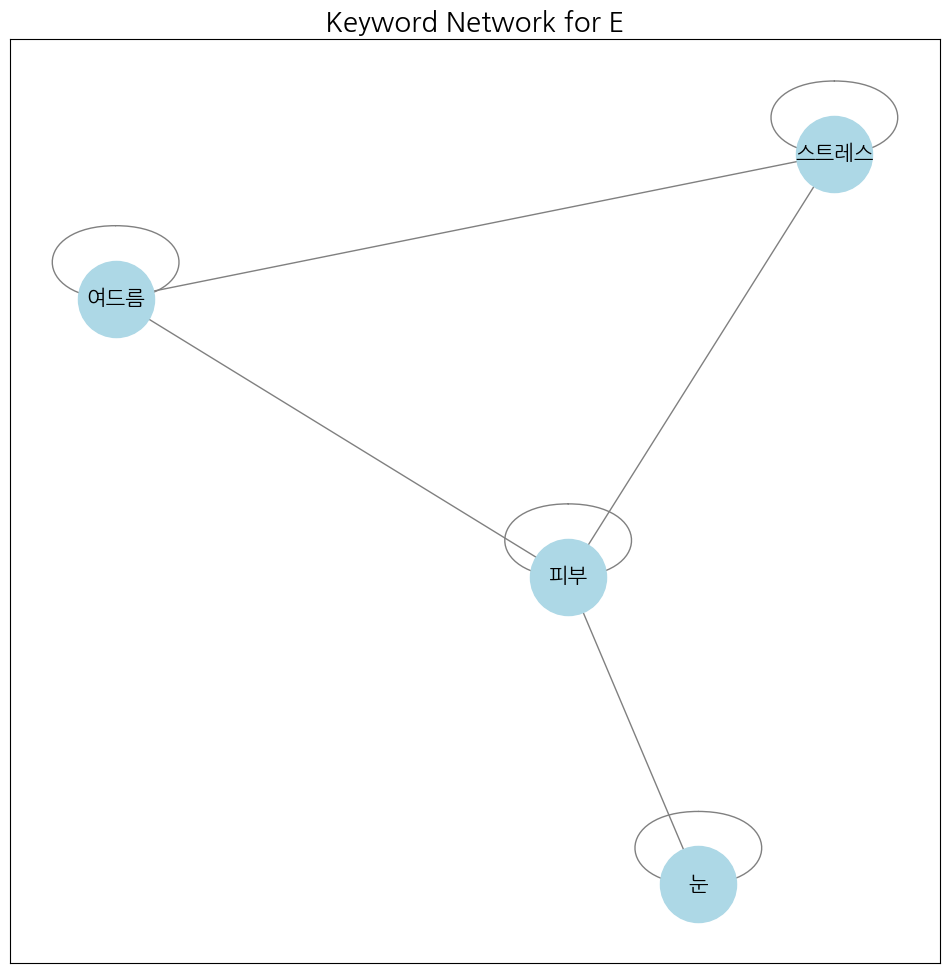

In [19]:
# 각 채널별로 네트워크 분석 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    G = create_keyword_network(filtered_tokens[:30])
    draw_network(G, f"Keyword Network for {channel_gubun[channel_id]}")

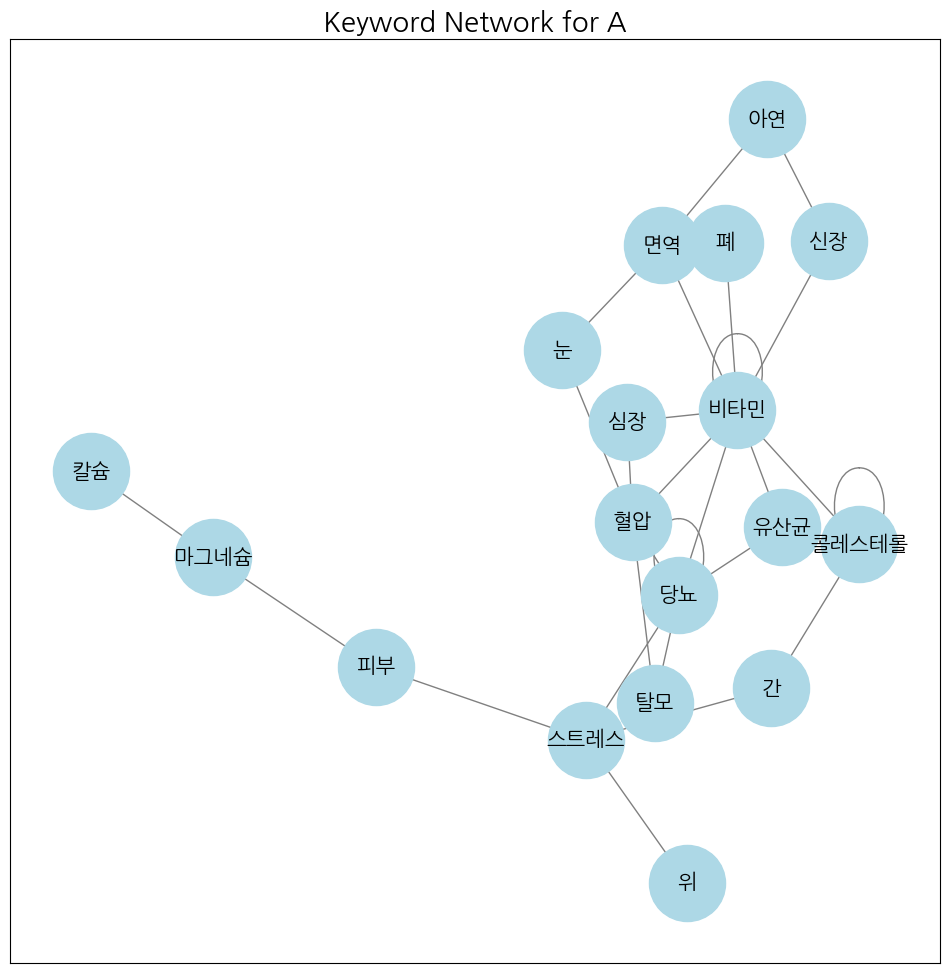

Top 5 nodes by centrality: [('비타민', 0.5882352941176471), ('당뇨', 0.4117647058823529), ('혈압', 0.29411764705882354), ('스트레스', 0.23529411764705882), ('면역', 0.23529411764705882)]


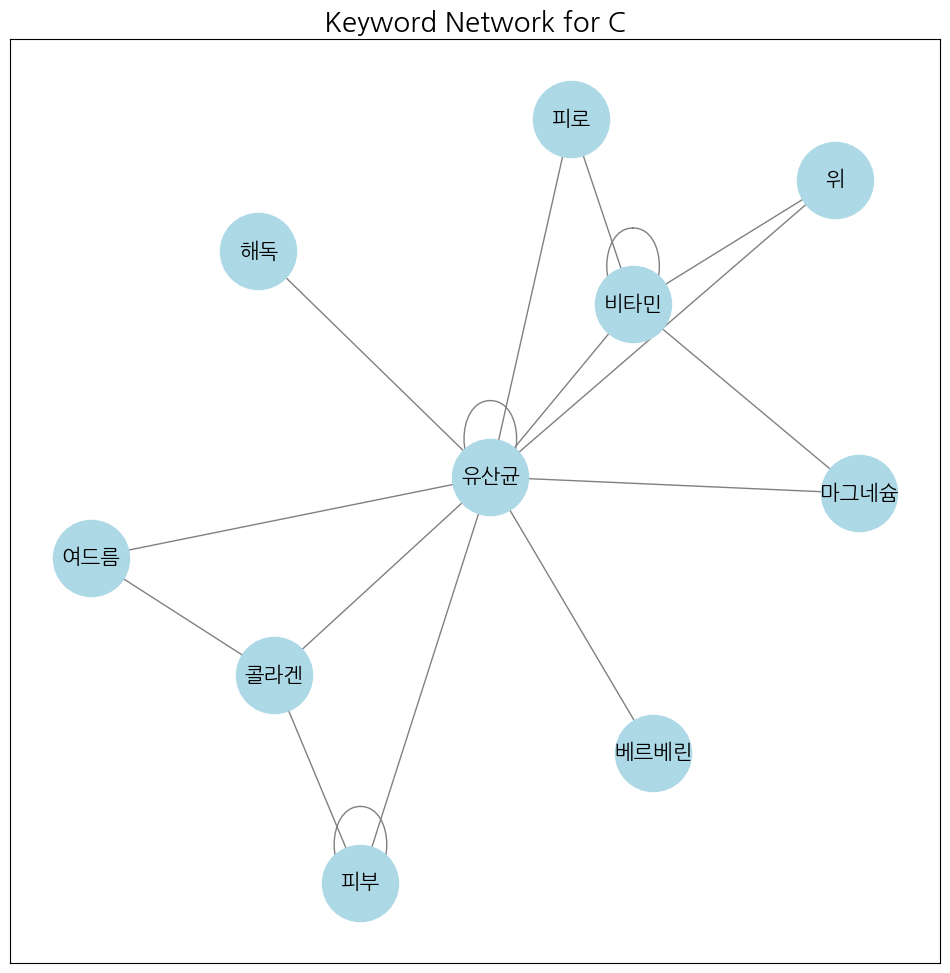

Top 5 nodes by centrality: [('유산균', 1.222222222222222), ('비타민', 0.6666666666666666), ('피부', 0.4444444444444444), ('콜라겐', 0.3333333333333333), ('여드름', 0.2222222222222222)]


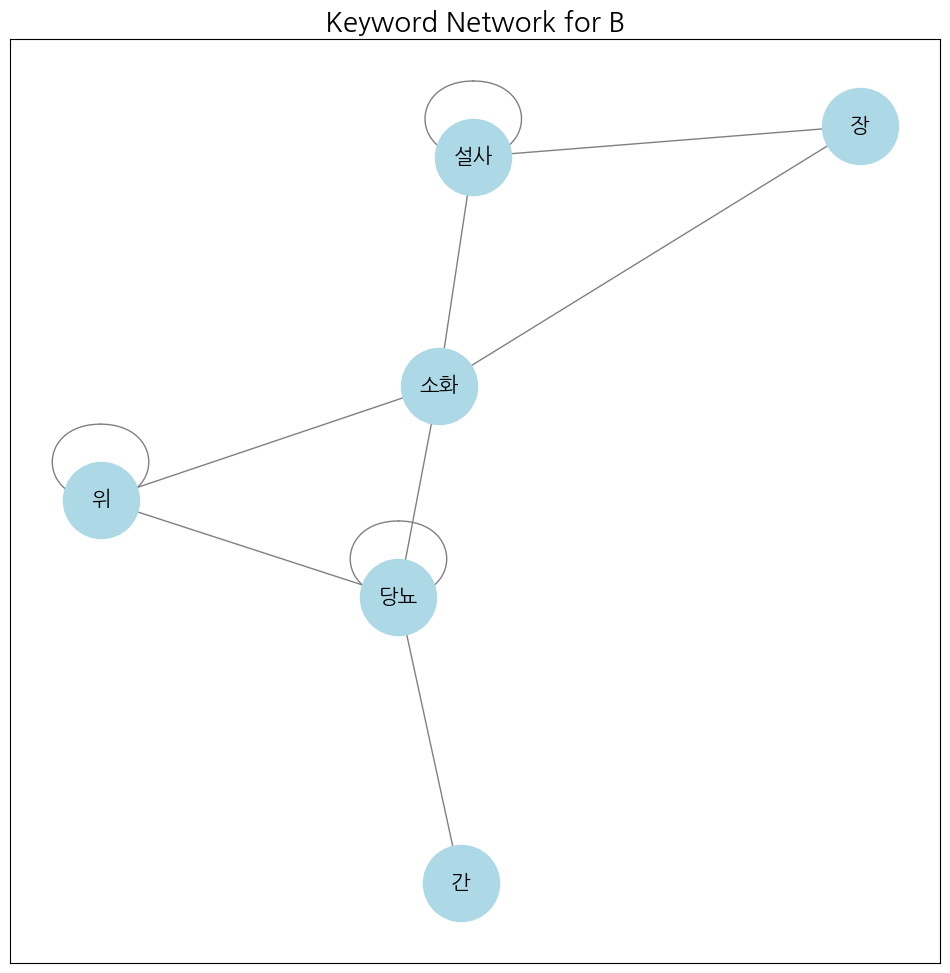

Top 5 nodes by centrality: [('당뇨', 1.0), ('소화', 0.8), ('설사', 0.8), ('위', 0.8), ('장', 0.4)]


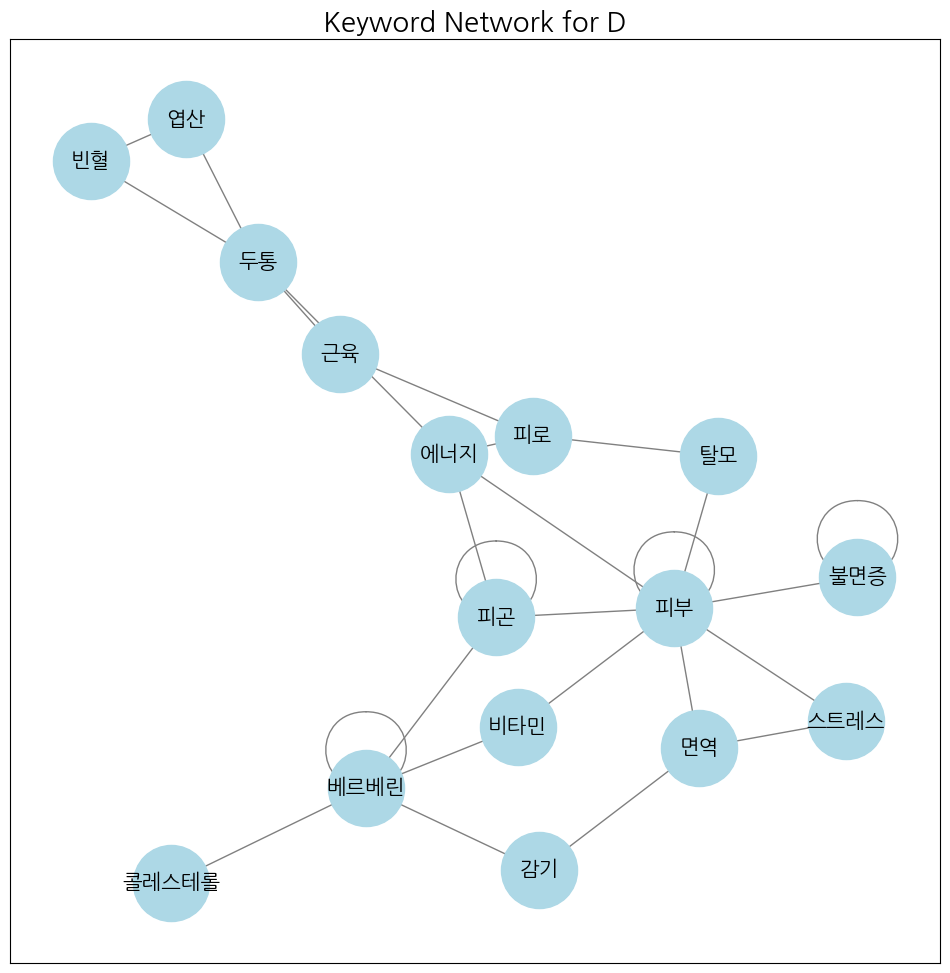

Top 5 nodes by centrality: [('피부', 0.6), ('베르베린', 0.4), ('피곤', 0.3333333333333333), ('에너지', 0.26666666666666666), ('두통', 0.26666666666666666)]


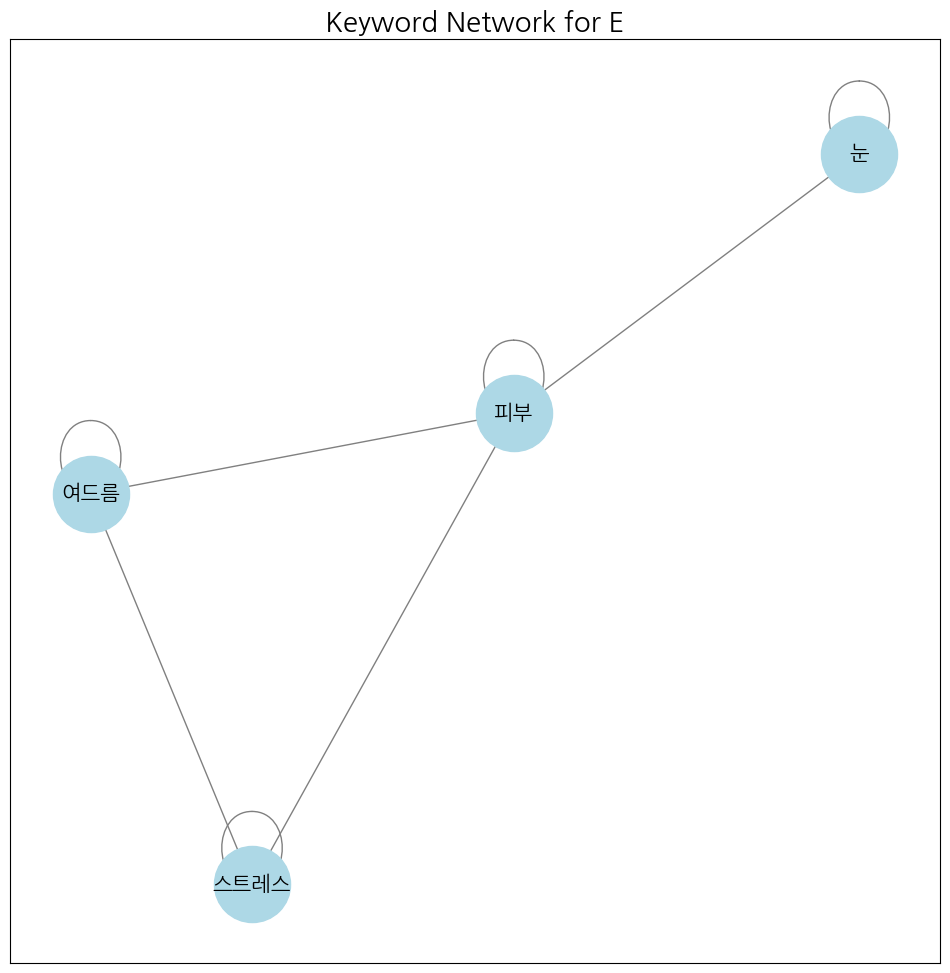

Top 5 nodes by centrality: [('피부', 1.6666666666666665), ('스트레스', 1.3333333333333333), ('여드름', 1.3333333333333333), ('눈', 1.0)]


In [20]:
# 각 채널별로 네트워크 분석 및 중심성 계산 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    G = create_keyword_network(filtered_tokens[:30])
    draw_network(G, f"Keyword Network for {channel_gubun[channel_id]}")
    calculate_centrality(G)

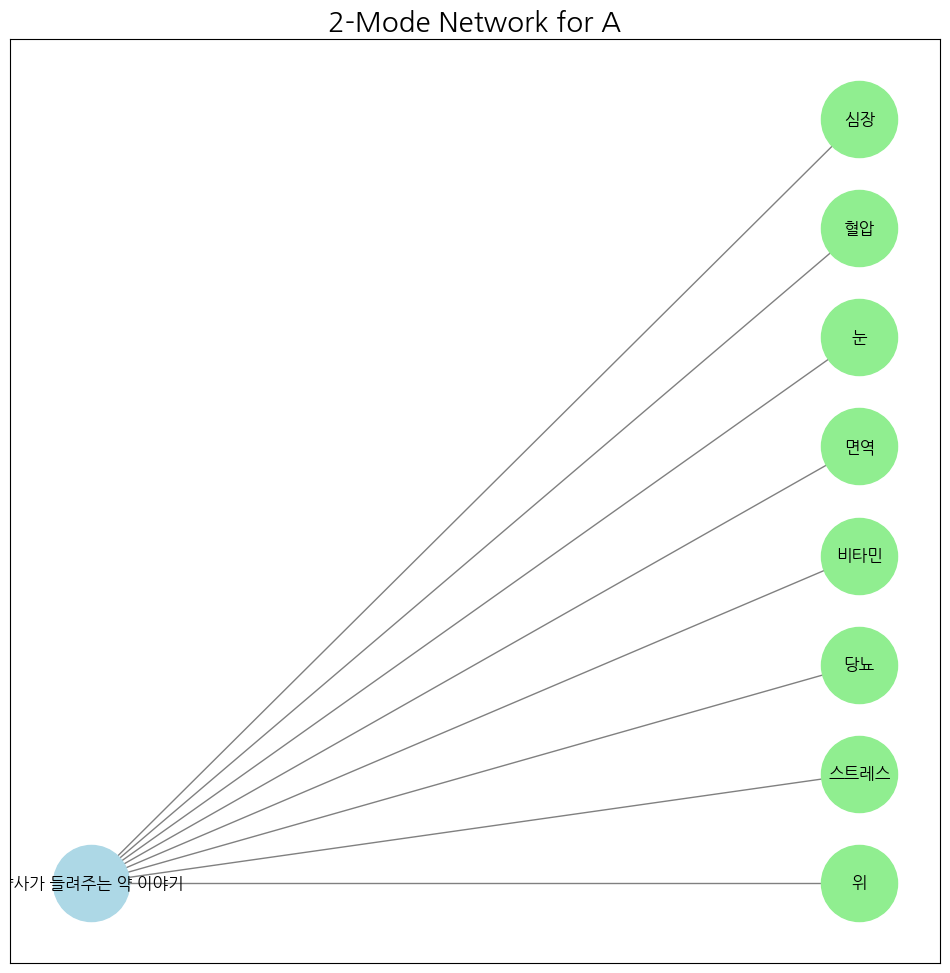

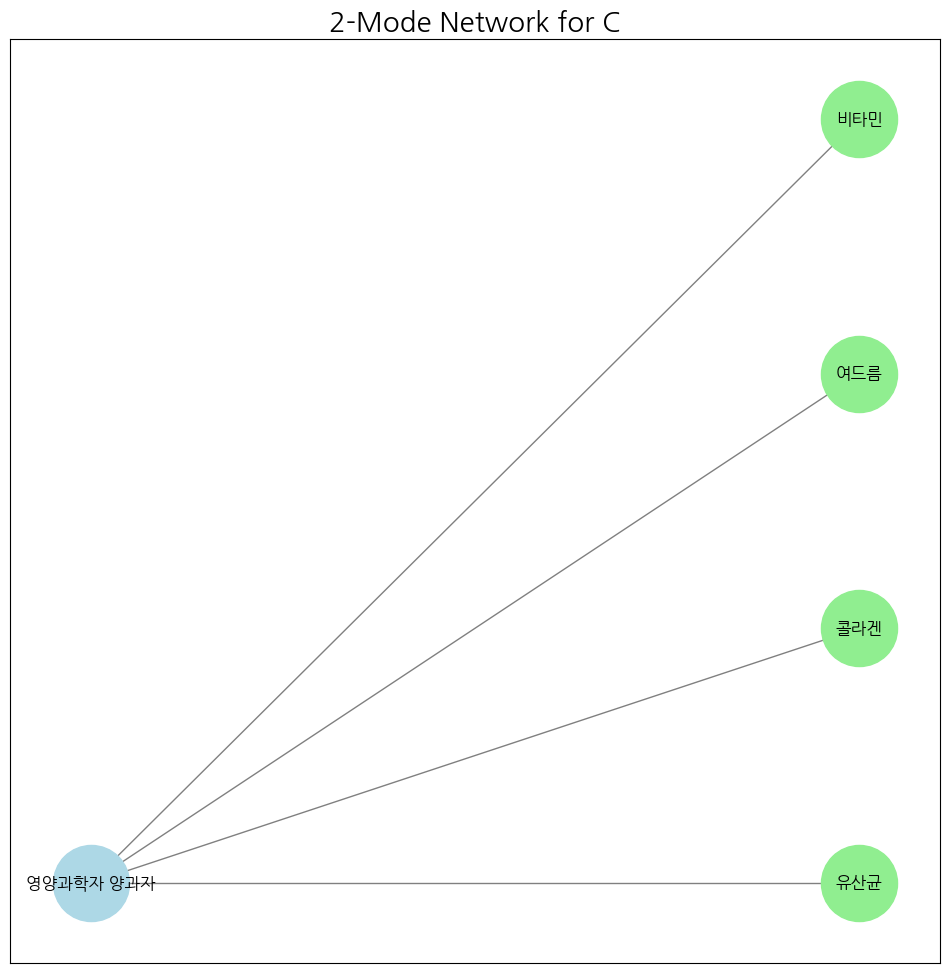

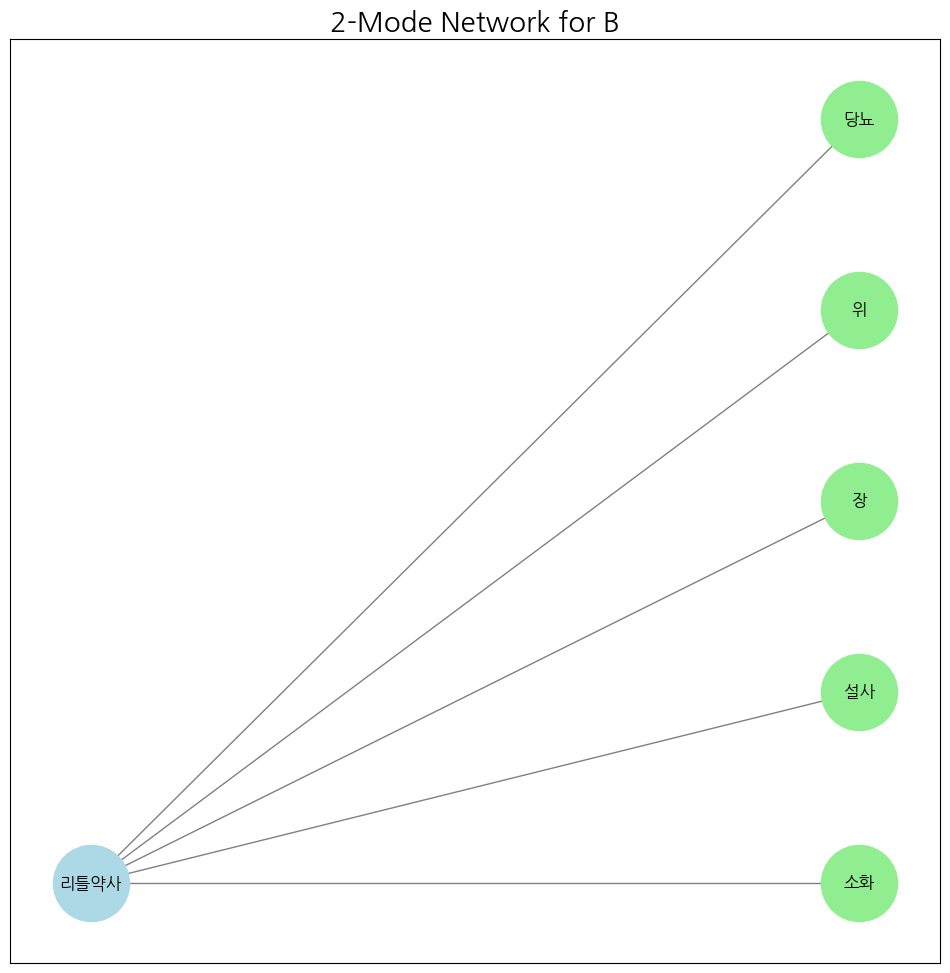

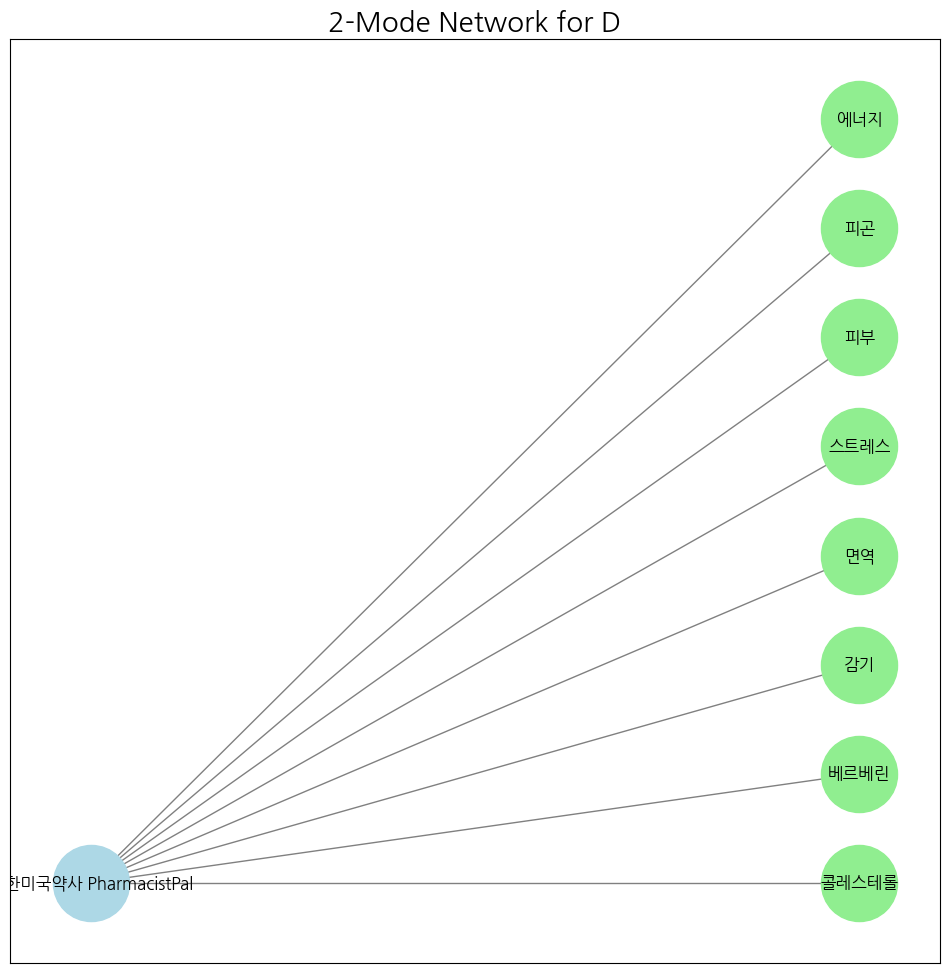

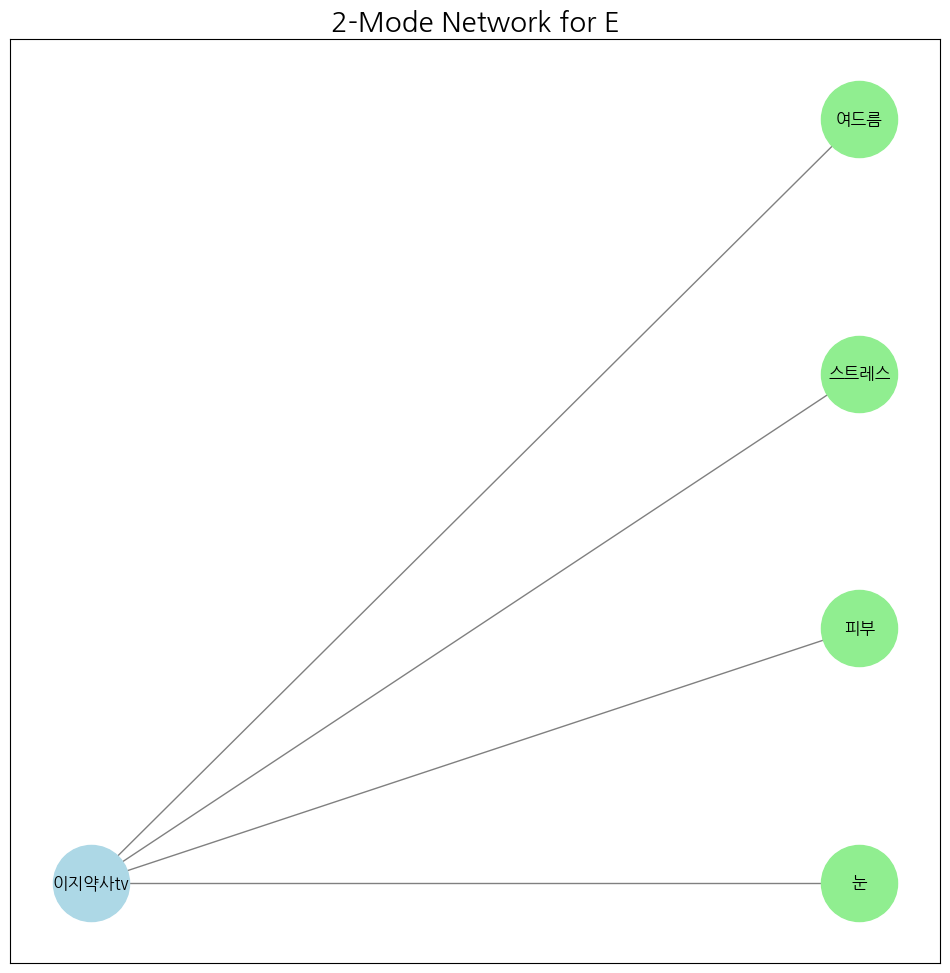

In [21]:
def create_2mode_network(channel, tokens):
    G = nx.Graph()
    # 채널 노드 추가
    G.add_node(channel, bipartite=0)
    # 키워드 노드 추가 및 채널과 연결
    for token in tokens:
        if token in nutrient_keywords:
            G.add_node(token, bipartite=1)
            G.add_edge(channel, token)
    return G

def draw_network(G, title):
    plt.figure(figsize=(12, 12))
    # 2-mode 네트워크 레이아웃 분리
    top_nodes = {n for n, d in G.nodes(data=True) if d['bipartite']==0}
    bottom_nodes = set(G) - top_nodes
    pos = nx.bipartite_layout(G, top_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='lightblue', node_size=3000)
    nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='lightgreen', node_size=3000)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family=font_name)
    plt.title(title, fontsize=20)
    plt.show()

# 각 채널별로 2-mode 네트워크 분석 수행
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]
    G = create_2mode_network(channel_titles[channel_id], filtered_tokens[:10])
    draw_network(G, f"2-Mode Network for {channel_gubun[channel_id]}")

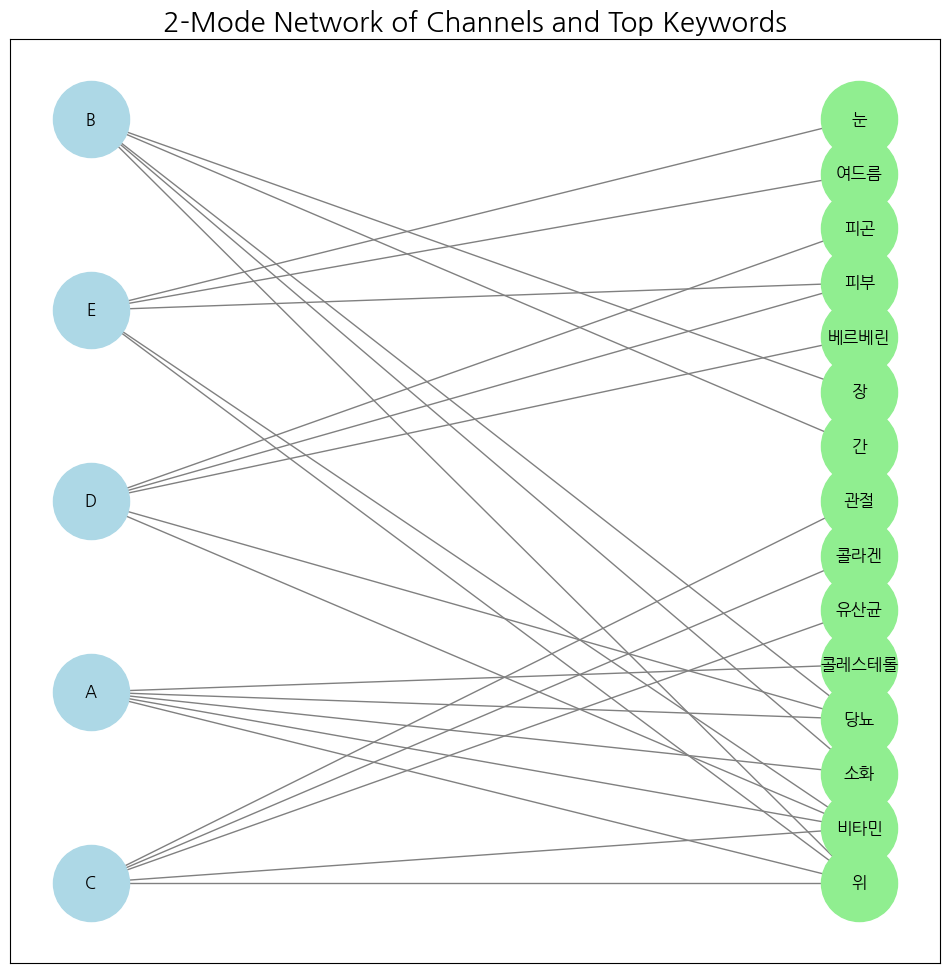

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Mecab 초기화
mecab = Mecab()

# 토크나이저 함수 정의
def mecab_tokenizer(text):
    return mecab.nouns(text)

# 전체 네트워크 초기화
global_network = nx.Graph()

# 각 채널별로 키워드 추출 및 네트워크 추가
for channel_id in channels:
    channel_comments = top_video_comments[top_video_comments['channelId'] == channel_id]
    if len(channel_comments) > sample_size:
        channel_comments = channel_comments.sample(n=sample_size, random_state=42)
    all_comments = ' '.join(channel_comments['commentText'].dropna())
    tokens = preprocess_text(all_comments)
    filtered_tokens = [word for word in tokens if word in nutrient_keywords]

    # TF-IDF를 사용하여 상위 5개 키워드 추출
    tfidf_vectorizer = TfidfVectorizer(tokenizer=mecab_tokenizer, lowercase=False)
    tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(filtered_tokens)])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray().flatten()
    features_scores = dict(zip(feature_names, tfidf_scores))
    top_features = Counter(features_scores).most_common(5)
    top_keywords = [(feature, score) for feature, score in top_features]  # 이 부분을 수정

    # 채널 노드 추가
    global_network.add_node(channel_gubun[channel_id], bipartite=0)

    # 키워드 노드 추가 및 채널과 연결
    for keyword, _ in top_keywords:  # 이 부분이 정상적으로 작동하도록 수정됨
        global_network.add_node(keyword, bipartite=1)
        global_network.add_edge(channel_gubun[channel_id], keyword)

# 2-모드 네트워크 시각화
plt.figure(figsize=(12, 12))
top_nodes = {n for n, d in global_network.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(global_network) - top_nodes
pos = nx.bipartite_layout(global_network, top_nodes)
nx.draw_networkx_nodes(global_network, pos, nodelist=top_nodes, node_color='lightblue', node_size=3000)
nx.draw_networkx_nodes(global_network, pos, nodelist=bottom_nodes, node_color='lightgreen', node_size=3000)
nx.draw_networkx_edges(global_network, pos, edge_color='gray')
nx.draw_networkx_labels(global_network, pos, font_size=12, font_family='NanumGothic')
plt.title('2-Mode Network of Channels and Top Keywords', fontsize=20)
plt.show()